## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

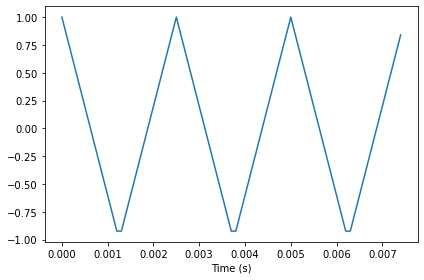

In [15]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(400)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [16]:
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

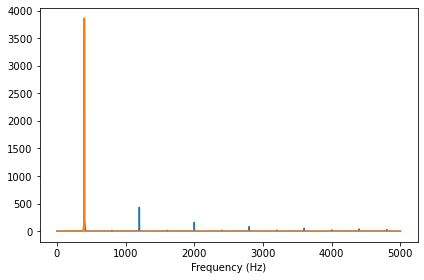

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

spectrum.low_pass(400)
spectrum.plot()

Make a square signal and plot a 3 period segment.

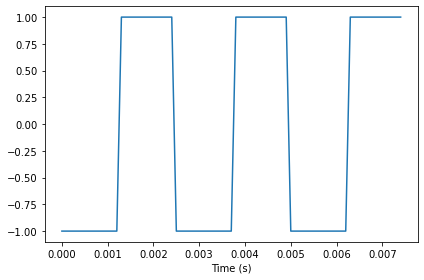

In [19]:
from thinkdsp import SquareSignal

signal = SquareSignal(400)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [20]:
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

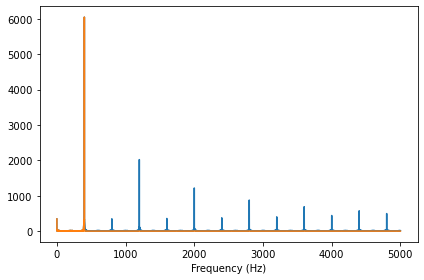

In [22]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')
spectrum.low_pass(400)
spectrum.plot()

Create a sawtooth signal and plot a 3 period segment.

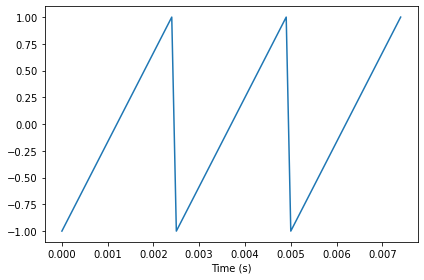

In [23]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(400)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [25]:
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

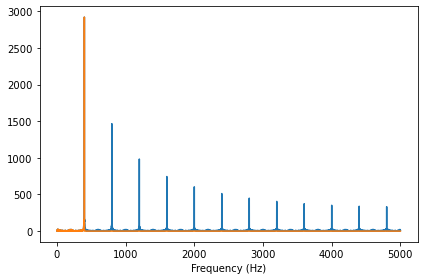

In [26]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')
spectrum.low_pass(400)
spectrum.plot()

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

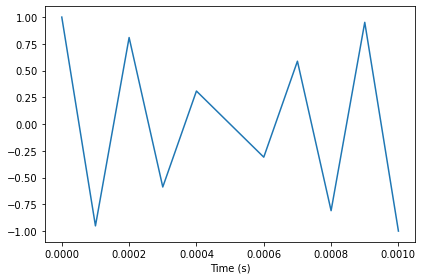

In [27]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

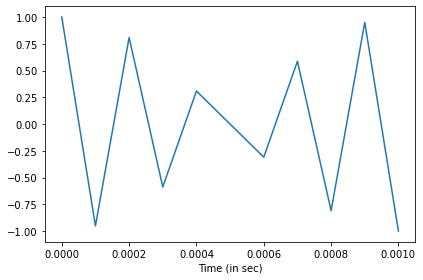

In [31]:
signal = CosSignal(5500)
duration = signal.period*6
segment = signal.make_wave(duration,framerate=1e+4)
segment.plot()
decorate(xlabel = "Time (in sec)")

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

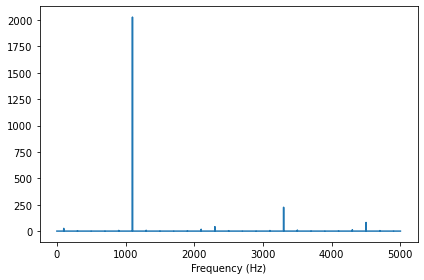

In [32]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Amplitude and phase

Make a sawtooth wave.

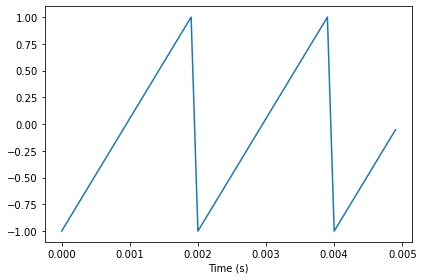

In [33]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play it.

In [34]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [39]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs.shape

(5001,)

Compute the frequencies that match up with the elements of the FFT.

In [36]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Plot the magnitudes vs the frequencies.

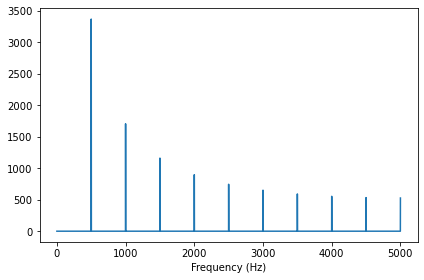

In [37]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)')

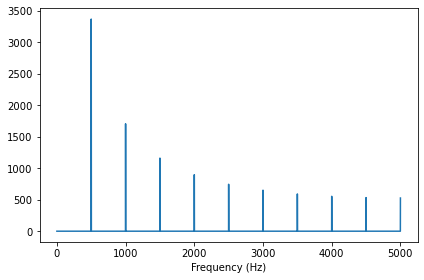

In [38]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Plot the phases vs the frequencies.

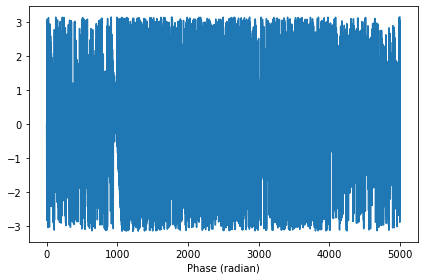

In [40]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

## What does phase sound like?

Shuffle the phases.

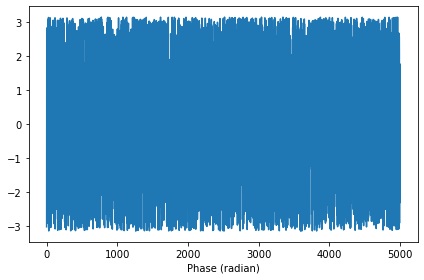

In [41]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [42]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

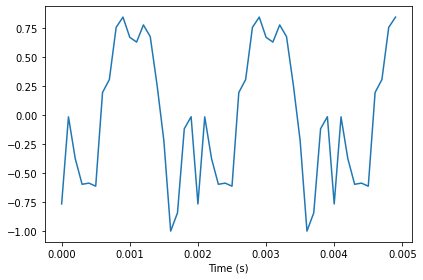

In [43]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play the wave with the shuffled phases.

In [44]:
wave2.make_audio()

For comparison, here's the original wave again.

In [45]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [46]:
def view_harmonics(freq, framerate):
    """Plot the spectrum of a sawtooth signal.
    
    freq: frequency in Hz
    framerate: in frames/second
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='C0')
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
    display(wave.make_audio())

In [47]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

# Exercise 2.4
If you have a spectrum object, spectrum, and print the first few
values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0]
is the magnitude of the component with frequency 0. But what does that
mean?
Try this experiment:
1. Make a triangle signal with frequency 440 and make a Wave with dura-
tion 0.01 seconds. Plot the waveform.
2. Make a Spectrum object and print spectrum.hs[0]. What is the am-
plitude and phase of this component?
3. Set spectrum.hs[0] = 100. Make a Wave from the modified Spectrum
and plot it. What eﬀect does this operation have on the waveform?

In [50]:
spectrum.fs[:10],spectrum.hs[:10]

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([-5.07596300e-13-6.38052625e-14j, -2.12705992e-13+1.45364212e-13j,
        -2.07487994e-13+7.35545862e-14j, -1.56118775e-13+7.19594237e-14j,
         7.43010156e-14-5.27245357e-14j,  8.57185844e-14-1.24741293e-13j,
        -2.10917108e-13-6.14982656e-14j,  2.70836563e-13-7.53446654e-14j,
        -8.37645747e-14+2.69092017e-14j, -3.19234171e-14+1.96964388e-13j]))

In [51]:
signal = TriangleSignal(440)
t_wave = signal.make_wave(duration=0.01)

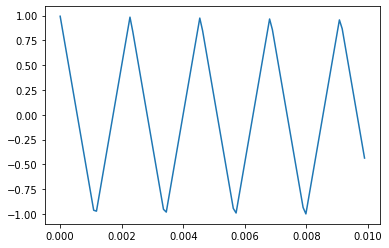

In [52]:
t_wave.plot()

In [54]:
spectrum = t_wave.make_spectrum()

In [55]:
spectrum.hs[0]

(1.0436096431476471e-14+0j)

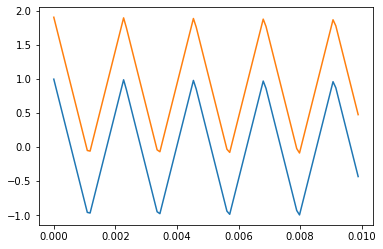

In [56]:
spectrum.hs[0] = 100
mod_wave = spectrum.make_wave()
t_wave.plot()
mod_wave.plot()

# Exercise 2.5

Write a function that takes a Spectrum as a parameter and
modifies it by dividing each element of hs by the corresponding frequency
from fs. Hint: since division by zero is undefined, you might want to set
spectrum.hs[0] = 0.
Test your function using a square, triangle, or sawtooth wave.
1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What eﬀect
does this operation have on the signal?

In [59]:
def e2_5(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]
    return spectrum

In [60]:
test1 = TriangleSignal(400).make_wave(duration = 0.1)
test2 = SquareSignal(400).make_wave(duration = 0.1)
test3 = SawtoothSignal(400).make_wave(duration = 0.1)

spe1 = test1.make_spectrum()
spe2 = test2.make_spectrum()
spe3 = test3.make_spectrum()

mod_Spe1 = e2_5(spe1)
mod_Spe2 = e2_5(spe2)
mod_Spe3 = e2_5(spe3)

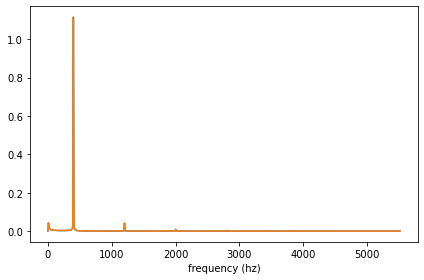

In [64]:
spe1.plot()
mod_Spe1.plot()
decorate(xlabel = "frequency (hz)")

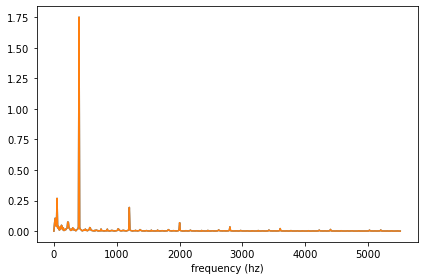

In [65]:
spe2.plot()
mod_Spe2.plot()
decorate(xlabel = "frequency (hz)")

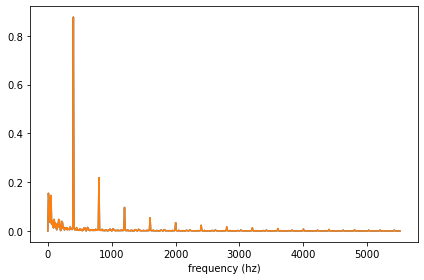

In [66]:
spe3.plot()
mod_Spe3.plot()
decorate(xlabel = "frequency (hz)")

In [68]:
test1.make_audio()

In [67]:
mod_test1 = mod_Spe1.make_wave()
mod_test1.make_audio()

In [69]:
test2.make_audio()

In [70]:
mod_test2 = mod_Spe2.make_wave()
mod_test2.make_audio()

In [71]:
test3.make_audio()

In [72]:
mod_test3 = mod_Spe3.make_wave()
mod_test3.make_audio()